In [1]:
import torch

In [2]:
x = torch.arange(6.0)
x

tensor([0., 1., 2., 3., 4., 5.])

In [3]:
x.requires_grad_(True)
x.grad

In [4]:
y = 2 * torch.dot(x,x)
y

tensor(110., grad_fn=<MulBackward0>)

In [5]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12., 16., 20.])

In [6]:
a = x ** 2
# a 是 非叶子变量
a.retain_grad()
a

tensor([ 0.,  1.,  4.,  9., 16., 25.], grad_fn=<PowBackward0>)

In [7]:
z = a.sum()
z

tensor(55., grad_fn=<SumBackward0>)

**如果不清除x的梯度 下次计算的梯度会累加到x.grad中**

In [8]:
z.backward(retain_graph=True)
x.grad,a.grad

(tensor([ 0.,  6., 12., 18., 24., 30.]), tensor([1., 1., 1., 1., 1., 1.]))

**清除x的梯度 则不会累加x.grad**

In [9]:
x.grad.zero_()
z.backward(retain_graph=True)
x.grad,a.grad

(tensor([ 0.,  2.,  4.,  6.,  8., 10.]), tensor([2., 2., 2., 2., 2., 2.]))

In [10]:
def f(a):
    b = a * 2
    while b.norm()<1000:
        b = b * 2
    if b.sum()>0:
        c = b
    else:
        c = 100 * b
    return c

In [11]:
a = torch.randn(size = (),requires_grad = True)
d = f(a)
d.backward()

a,a.grad == d/a

(tensor(-0.0908, requires_grad=True), tensor(True))

## 1. 自动求导为什么要设计累加机制？  
如图所示，求导即是梯度，确定变量变化最大的方向。由于自动求导使用的是链式法则，所以每次求出的都是向量1，2，3.累积才是向量0，整体的梯度方向。  
累加机制是设置是为了方便计算batch。  
![image1.png](https://gitee.com/Bethexone/picgo/raw/master/Ubuntu_opencv_410//202408141722730.png)
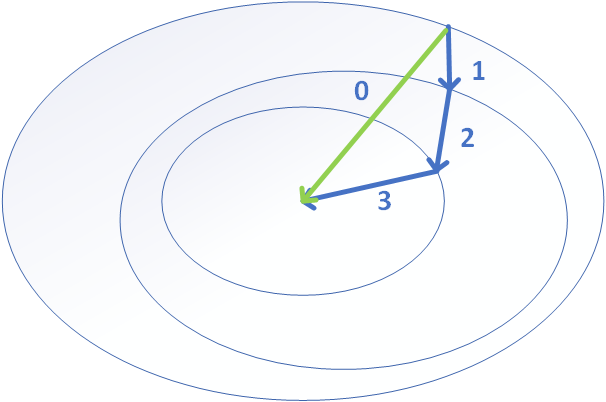

### 示例：

In [12]:
x1 = torch.arange(6.0)
x1.requires_grad_(True)
x1

tensor([0., 1., 2., 3., 4., 5.], requires_grad=True)

In [13]:
y1 = x1 + 8
y1.retain_grad()
y1.sum().backward()
tmp1 = x1.grad.clone()
y1,x1.grad,y1.grad

(tensor([ 8.,  9., 10., 11., 12., 13.], grad_fn=<AddBackward0>),
 tensor([1., 1., 1., 1., 1., 1.]),
 tensor([1., 1., 1., 1., 1., 1.]))

In [14]:
z1 = y1**2
z1

tensor([ 64.,  81., 100., 121., 144., 169.], grad_fn=<PowBackward0>)

In [15]:
y1.grad.zero_()
x1.grad.zero_()
z1.sum().backward()
tmp2 = y1.grad.clone()
x1.grad,y1.grad

(tensor([16., 18., 20., 22., 24., 26.]),
 tensor([16., 18., 20., 22., 24., 26.]))

In [16]:
tmp1,tmp2

(tensor([1., 1., 1., 1., 1., 1.]), tensor([16., 18., 20., 22., 24., 26.]))